In [1]:
# 查看当前挂载的数据集目录, 该目录下的变更重启环境后会自动还原
# View dataset directory. 
# This directory will be recovered automatically after resetting environment. 
!ls /home/aistudio/data

data137263


In [2]:
# 查看工作区文件, 该目录下的变更将会持久保存. 请及时清理不必要的文件, 避免加载过慢.
# View personal work directory. 
# All changes under this directory will be kept even after reset. 
# Please clean unnecessary files in time to speed up environment loading. 
!ls /home/aistudio/work

In [3]:
# 如果需要进行持久化安装, 需要使用持久化路径, 如下方代码示例:
# If a persistence installation is required, 
# you need to use the persistence path as the following: 
!mkdir /home/aistudio/external-libraries
!pip install beautifulsoup4 -t /home/aistudio/external-libraries

mkdir: cannot create directory ‘/home/aistudio/external-libraries’: File exists
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 kB 492.8 kB/s eta 0:00:00a 0:00:01

[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: pip install --upgrade pip


In [4]:
# 同时添加如下代码, 这样每次环境(kernel)启动的时候只要运行下方代码即可: 
# Also add the following code, 
# so that every time the environment (kernel) starts, 
# just run the following code: 
import sys 
sys.path.append('/home/aistudio/external-libraries')

请点击[此处](https://ai.baidu.com/docs#/AIStudio_Project_Notebook/a38e5576)查看本环境基本用法.  <br>
Please click [here ](https://ai.baidu.com/docs#/AIStudio_Project_Notebook/a38e5576) for more detailed instructions. 

In [5]:
import pandas as pd
import paddle
import numpy as np

%pylab inline
import seaborn as sns

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/__init__.py:107: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import MutableMapping
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/rcsetup.py:20: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Iterable, Mapping
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/colors.py:53: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sized


Populating the interactive namespace from numpy and matplotlib


In [6]:
train_df = pd.read_csv('data/data137263/pubg_train.csv.zip')
test_df = pd.read_csv('data/data137263/pubg_test.csv.zip')

In [7]:
train_df.shape, test_df.shape

((1500000, 16), (500000, 15))

In [8]:
train_df.head()

,match_id,team_id,game_size,party_size,player_assists,player_dbno,player_dist_ride,player_dist_walk,player_dmg,player_kills,player_name,kill_distance_x_min,kill_distance_x_max,kill_distance_y_min,kill_distance_y_max,team_placement
0,0,1,50,2,0,1,4984.54900,2054.031490,218,2,0,1689.9,3992.9,137.0,819.8,5
1,0,1,50,2,1,0,5960.46436,2268.221000,125,0,1,NaN,NaN,NaN,NaN,5
2,0,2,50,2,0,0,0.00000,0.000000,0,0,2,NaN,NaN,NaN,NaN,49
3,0,2,50,2,0,0,0.00000,5.211829,41,0,3,NaN,NaN,NaN,NaN,49
4,0,3,50,2,0,0,0.00000,341.730927,69,0,4,NaN,NaN,NaN,NaN,34


/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:2349: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  if isinstance(obj, collections.Iterator):
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:2366: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  return list(data) if isinstance(data, collections.MappingView) else data
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/colors.py:101: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  ret = np.asscalar(ex)


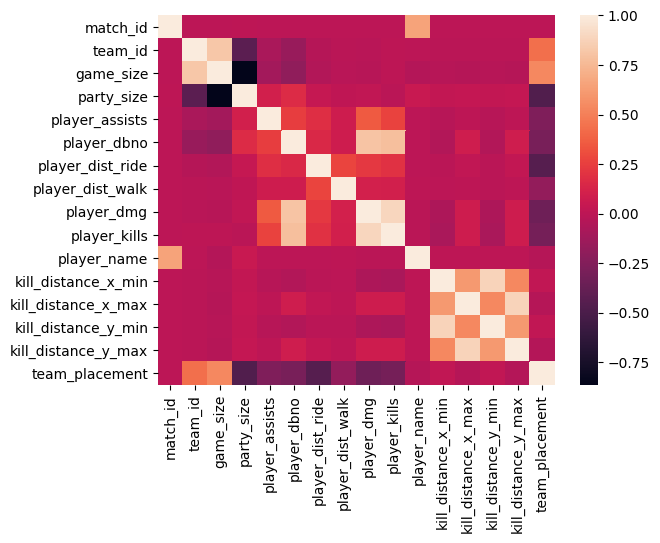

In [9]:
sns.heatmap(train_df.corr())

In [10]:
train_df = train_df.drop(['match_id', 'team_id'], axis=1)
test_df = test_df.drop(['match_id', 'team_id'], axis=1)

In [11]:
train_df = train_df.fillna(0)
test_df = test_df.fillna(0)

In [12]:
# 数值归一化
for col in train_df.columns[:-1]:
    train_df[col] /= train_df[col].max()
    test_df[col] /= test_df[col].max()

In [13]:
class Regressor(paddle.nn.Layer):
    # self代表类的实例自身
    def __init__(self):
        # 初始化父类中的一些参数
        super(Regressor, self).__init__()

        self.fc1 = paddle.nn.Linear(in_features=13, out_features=60)
        self.fc2 = paddle.nn.Linear(in_features=60, out_features=40)
        self.fc3 = paddle.nn.Linear(in_features=40, out_features=20)
        self.fc4 = paddle.nn.Linear(in_features=20, out_features=1)

        self.relu = paddle.nn.ReLU()

    # 网络的前向计算
    def forward(self, inputs):
        x = self.fc1(inputs)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        x = self.relu(x)
        x = self.fc4(x)
        x = self.relu(x)
        return x

In [14]:
# 声明定义好的线性回归模型
model = Regressor()

W0929 19:17:55.539944   192 gpu_resources.cc:61] Please NOTE: device: 0, GPU Compute Capability: 7.0, Driver API Version: 11.2, Runtime API Version: 11.2
W0929 19:17:55.544288   192 gpu_resources.cc:91] device: 0, cuDNN Version: 8.2.


In [15]:
# 开启模型训练模式
model.train()

In [12]:
# 定义优化算法，使用随机梯度下降SGD
opt = paddle.optimizer.Adam(learning_rate=0.0018, parameters=model.parameters())
EPOCH_NUM = 1000  # 设置外层循环次数
BATCH_SIZE = 1000  # 设置batch大小
training_data = train_df.iloc[:-10000].values.astype(np.float32)
val_data = train_df.iloc[-10000:].values.astype(np.float32)

# 定义外层循环
for epoch_id in range(EPOCH_NUM):
    # 在每轮迭代开始之前，将训练数据的顺序随机的打乱
    np.random.shuffle(training_data)

    # 将训练数据进行拆分，每个batch包含10条数据
    mini_batches = [training_data[k:k + BATCH_SIZE] for k in range(0, len(training_data), BATCH_SIZE)]

    train_loss = []
    for iter_id, mini_batch in enumerate(mini_batches):
        # 清空梯度变量，以备下一轮计算
        opt.clear_grad()

        x = np.array(mini_batch[:, :-1])
        y = np.array(mini_batch[:, -1:])

        # 将numpy数据转为飞桨动态图tensor的格式
        features = paddle.to_tensor(x)
        y = paddle.to_tensor(y)

        # 前向计算
        predicts = model(features)

        # 计算损失
        loss = paddle.nn.functional.l1_loss(predicts, label=y)
        avg_loss = paddle.mean(loss)
        train_loss.append(avg_loss.numpy())

        # 反向传播，计算每层参数的梯度值
        avg_loss.backward()

        # 更新参数，根据设置好的学习率迭代一步
        opt.step()

    mini_batches = [val_d ata[k:k + BATCH_SIZE] for k in range(0, len(val_data), BATCH_SIZE)]
    val_loss = []
    for iter_id, mini_batch in enumerate(mini_batches):
        x = np.array(mini_batch[:, :-1])
        y = np.array(mini_batch[:, -1:])

        features = paddle.to_tensor(x)
        y = paddle.to_tensor(y)

        predicts = model(features)
        loss = paddle.nn.functional.l1_loss(predicts, label=y)
        avg_loss = paddle.mean(loss)
        val_loss.append(avg_loss.numpy())

    print(f'Epoch {epoch_id}, train MAE {np.mean(train_loss)}, val MAE {np.mean(val_loss)}')


Epoch 0, train MAE 8.23804759979248, val MAE 5.641595363616943
Epoch 1, train MAE 5.133913040161133, val MAE 4.817919731140137
Epoch 2, train MAE 4.864184856414795, val MAE 4.7694501876831055
Epoch 3, train MAE 4.799079418182373, val MAE 4.663027763366699
Epoch 4, train MAE 4.758505821228027, val MAE 4.63692569732666
Epoch 5, train MAE 4.744633674621582, val MAE 4.608206272125244
Epoch 6, train MAE 4.719767093658447, val MAE 4.665353775024414
Epoch 7, train MAE 4.7132768630981445, val MAE 4.61814546585083
Epoch 8, train MAE 4.704927921295166, val MAE 4.630678653717041
Epoch 9, train MAE 4.700148582458496, val MAE 4.630064010620117
Epoch 10, train MAE 4.695914268493652, val MAE 4.584780693054199
Epoch 11, train MAE 4.695335865020752, val MAE 4.677590370178223
Epoch 12, train MAE 4.680103778839111, val MAE 4.610407829284668
Epoch 13, train MAE 4.68800687789917, val MAE 4.587606906890869
Epoch 14, train MAE 4.681783676147461, val MAE 4.5788679122924805
Epoch 15, train MAE 4.68310022354126

In [13]:
model.eval()

In [14]:
test_data = paddle.to_tensor(test_df.values.astype(np.float32))

In [15]:
test_predict = model(test_data)
test_predict = test_predict.numpy().flatten()
test_predict = test_predict.round().astype(int)

In [16]:
pd.DataFrame({
    'team_placement': test_predict
}).to_csv('submission.csv', index=None)

In [17]:
!zip submission.zip submission.csv